<a href="https://colab.research.google.com/github/C3Suryansu/Traditional-Dance-Classification/blob/master/Dance_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!git clone https://github.com/C3Suryansu/Traditional-Dance-Classification.git

--2020-06-21 13:15:39--  https://github.com/C3Suryansu/Traditional-Dance-Classification.git
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/C3Suryansu/Traditional-Dance-Classification [following]
--2020-06-21 13:15:39--  https://github.com/C3Suryansu/Traditional-Dance-Classification
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Traditional-Dance-Classification.git’

Traditional-Dance-C     [ <=>                ]  81.06K  --.-KB/s    in 0.03s   

2020-06-21 13:15:39 (2.72 MB/s) - ‘Traditional-Dance-Classification.git’ saved [83008]



In [43]:
import pandas as pd
train_df = pd.read_csv('Traditional-Dance-Classification/dataset/train.csv')
test_df = pd.read_csv('Traditional-Dance-Classification/dataset/test.csv')

In [44]:
print(train_df.head())
print(test_df.head())

     Image         target
0   96.jpg       manipuri
1  163.jpg  bharatanatyam
2  450.jpg         odissi
3  219.jpg      kathakali
4  455.jpg         odissi
     Image
0  508.jpg
1  246.jpg
2  473.jpg
3  485.jpg
4  128.jpg


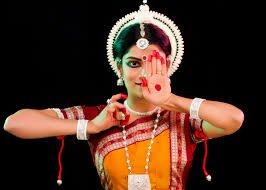

(190, 266, 3)

In [45]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('Traditional-Dance-Classification/dataset/train/' + str(train_df['Image'][4]))
cv2_imshow(img)
img.shape

In [46]:
train_df['target'].value_counts()

mohiniyattam     50
odissi           49
bharatanatyam    47
kathakali        47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
train, validate = train_test_split(train_df, test_size = 0.25, random_state = 1)

In [48]:
train['target'].value_counts()

bharatanatyam    40
mohiniyattam     38
odissi           35
kathakali        35
sattriya         32
kathak           31
manipuri         31
kuchipudi        31
Name: target, dtype: int64

In [49]:
validate['target'].value_counts()

kuchipudi        15
odissi           14
sattriya         13
kathak           13
kathakali        12
mohiniyattam     12
bharatanatyam     7
manipuri          5
Name: target, dtype: int64

In [131]:
import tensorflow as tf

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import activations
from tensorflow.keras import layers
import numpy as np

In [176]:
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape = (128,128,3), activation = 'relu'))
#classifier.add(BatchNormalization())
#classifier.add(layers.Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
#classifier.add(Dropout(0.5))

classifier.add(Conv2D(64, (3,3), activation = 'relu'))
#classifier.add(BatchNormalization())
#classifier.add(layers.Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))

classifier.add(Conv2D(128, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 8, activation = 'softmax'))

In [177]:
#lr = 0.001
#epochs = 50
classifier.compile(loss = 'categorical_crossentropy', 
                   optimizer='adam',
                   metrics = ['accuracy'])
#Adam(lr=lr,decay=lr/epochs)

In [178]:
classifier.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 128)     

In [179]:
from keras.preprocessing.image import ImageDataGenerator

In [180]:
train_image_data = ImageDataGenerator(rescale = 1./255,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True,
                                      vertical_flip = True)
val_image_data = ImageDataGenerator(rescale = 1./255)

In [181]:
train_generator = train_image_data.flow_from_dataframe(dataframe = train,
                                                       directory = 'Traditional-Dance-Classification/dataset/train',
                                                       x_col = 'Image',
                                                       y_col = 'target',
                                                       batch_size = 32,
                                                       class_mode = 'categorical',
                                                       shuffle = True,
                                                       target_size = (128,128))

Found 273 validated image filenames belonging to 8 classes.


In [182]:
test_generator = val_image_data.flow_from_dataframe(dataframe = validate,
                                                    directory = 'Traditional-Dance-Classification/dataset/train',
                                                    x_col = 'Image',
                                                    y_col = 'target',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    target_size = (128,128))

Found 91 validated image filenames belonging to 8 classes.


In [183]:
trained_model = classifier.fit(train_generator,
                               validation_data = test_generator,
                               epochs = 100)

Epoch 1/100
9/9 [==============================] - 10s 1s/step - loss: 2.1888 - accuracy: 0.1795 - val_loss: 2.0817 - val_accuracy: 0.0769
Epoch 2/100
9/9 [==============================] - 10s 1s/step - loss: 2.0789 - accuracy: 0.1648 - val_loss: 2.0769 - val_accuracy: 0.1319
Epoch 3/100
9/9 [==============================] - 10s 1s/step - loss: 2.0750 - accuracy: 0.1502 - val_loss: 2.0741 - val_accuracy: 0.1319
Epoch 4/100
9/9 [==============================] - 9s 1s/step - loss: 2.0509 - accuracy: 0.1429 - val_loss: 2.0567 - val_accuracy: 0.2198
Epoch 5/100
9/9 [==============================] - 10s 1s/step - loss: 2.0523 - accuracy: 0.1465 - val_loss: 2.0345 - val_accuracy: 0.2308
Epoch 6/100
9/9 [==============================] - 10s 1s/step - loss: 1.9972 - accuracy: 0.2198 - val_loss: 2.0056 - val_accuracy: 0.1758
Epoch 7/100
9/9 [==============================] - 10s 1s/step - loss: 1.9799 - accuracy: 0.2198 - val_loss: 1.9546 - val_accuracy: 0.2527
Epoch 8/100
9/9 [===========

In [186]:
classifier.evaluate_generator(generator=test_generator)
classifier.save('trained_model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


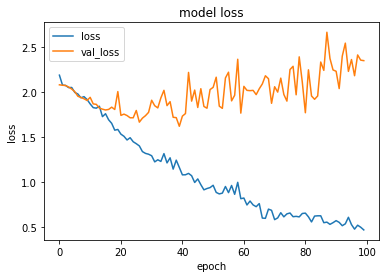

In [187]:
# Plot training and validation loss/accuracy
import matplotlib.pyplot as plt
print(trained_model.history.keys())
# Loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()